In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# the matrix A and the vector b for the Least Sqaures problem
def load_data(degree, data):
    data = np.genfromtxt(data, delimiter='  ')#read the data but with two columns of infinite values, we have to remove them
    #print(data)
    points = np.zeros((data.shape[0],2))
    for i in range(0,data.shape[0]):
        points[i,0] = data[i,0]
        points[i,1] = data[i,1]
    #Let us construct the matrix A and the vector b
    A = np.zeros((points.shape[0],degree))
    for i in range(0,points.shape[0]):
        A[i,:] = [points[i,0]**d for d in range(0,degree)]
    b = points[:,1]
    return A,b,points

In [ ]:
def load_csv(data):
    X = np.genfromtxt(data, delimiter=',')
    A, b = X[:,:-1], X[:,-1]
    return A,b

In [ ]:
# dades regressió
data = "drive/MyDrive/Numerical_Linear_Algebra/project2/dades.csv"
data_r = "drive/MyDrive/Numerical_Linear_Algebra/project2/dades_regressio.csv"

In [ ]:
def least_squares_svd(A, b):
    """
    Solve least squares using SVD.
    Optionally, apply Tikhonov regularization for stability.
    """
    U, Sigma, Vt = np.linalg.svd(A, full_matrices=True)
    # Regularized pseudo-inverse of Sigma
    m = U.shape[0]
    n = Vt.shape[0]
    Sigma_inv = np.zeros((n,m))

    for i in np.where(abs(Sigma)>1e-15):
        Sigma_inv[i,i]=1/Sigma[i]

    pseudo_inv = Vt.T @Sigma_inv@U.T
    return pseudo_inv@b

In [ ]:
x_svd = least_squares_svd(A_r, b_r)
x_svd

array([-2.03134280e+00, -2.03224420e+00,  5.02445020e+02, -8.60036812e+03,
        6.53495506e+04, -2.75578588e+05,  6.99165347e+05, -1.09179884e+06,
        1.02681476e+06, -5.33344900e+05,  1.17513315e+05])

In [ ]:
def least_squares_qr(A, b, varbose=False):
    """
    Solve least squares using QR decomposition.
    """
    r = np.linalg.matrix_rank(A)
    n = np.shape(A)[1] # Number of columns

    if r == n: # full rank case
      if varbose: print('Full rank matrix')
      Q, R = np.linalg.qr(A, mode = 'complete')
      y = Q.T@b
      y1 = y[:n]                    # First n components of y # compatible part
      R1 = R[:n,:]                  # Leading square part of R
      x = np.linalg.solve(R1, y1)   # Solve triangular system
      y2 = y[n:]                    # orthogonal component
      return x, np.linalg.norm(y2)  # Return solution and residual norm

    else: # rank-defficient case
      if varbose: print('Rank defficient matrix')
      Q, R, P = scipy.linalg.qr(A, pivoting=True) #apply QR with pivoting when its rank defficient
      P = np.identity(len(P))[:, P] # Convert permutation vector to matrix
      y = Q.T@b
      d = y[r:]                     # orthogonal component
      c = y[:r]                     # Leading r components of rotated b
      R1 = R[:r, :r]                # Leading square part of R
      u = np.linalg.solve(R1, c)    # Solve triangular system
      uv = np.zeros(n)              # Initialize solution vector
      uv[:r] = u                    # Fill first r components
      return P@uv, np.linalg.norm(d)**2 # Return permuted solution and residual norm

In [ ]:
x_qr = least_squares_qr(A, b)
x_qr

(array([0.20000039, 1.31085632, 0.98928421]), 118.39242671055328)

In [ ]:
A_r, b_r, points = load_data(degree=2, data=data)
x_qr_r = least_squares_qr(A_r, b_r)
x_qr_r

(array([-15.26610476,   9.39864351]), 37.11457973111771)

now try for different degrees

In [ ]:
#Run the loop with the new expanded matrix every time

# Variables
max_degree = 10
svd_errors = []
qr_errors = []
svd_coefs = []
qr_coefs = []

# Loop through degrees
for d in range(1, max_degree):
    print('Degree:', d)
    A, b, points = load_data(degree=d, data=data)

    # SVD
    coefficients_svd = least_squares_svd(A, b)
    svd_coefs.append(coefficients_svd)
    svd_errors.append(np.linalg.norm(np.dot(A, coefficients_svd) - b))
    print(coefficients_svd)

    # QR
    coefficients_qr, residual_norm = least_squares_qr(A, b)
    qr_coefs.append(coefficients_qr)
    print(coefficients_qr)
    qr_errors.append(np.linalg.norm(np.dot(A, coefficients_qr) - b))

Degree: 1
[22.17796358]
[22.17796358]
Degree: 2
[-15.26610476   9.39864351]
[-15.26610476   9.39864351]
Degree: 3
[0.20000039 1.31085632 0.98928421]
[0.20000039 1.31085632 0.98928421]
Degree: 4
[ 2.82509526e-01  1.24503537e+00  1.00548324e+00 -1.24231389e-03]
[ 2.82509526e-01  1.24503537e+00  1.00548324e+00 -1.24231389e-03]
Degree: 5
[-0.57539196  2.18013702  0.65200047  0.05420029 -0.00306246]
[-0.57539196  2.18013702  0.65200047  0.05420029 -0.00306246]
Degree: 6
[-2.85970427e+00  5.37082597e+00 -1.00593155e+00  4.58097984e-01
 -4.94839267e-02  2.02332516e-03]
[-2.85970427e+00  5.37082597e+00 -1.00593155e+00  4.58097984e-01
 -4.94839267e-02  2.02332516e-03]
Degree: 7
[ 2.45738208e-01  4.71990638e-02  2.55719459e+00 -7.41155603e-01
  1.65747949e-01 -1.75954700e-02  7.12341562e-04]
[ 2.45738208e-01  4.71990638e-02  2.55719459e+00 -7.41155603e-01
  1.65747949e-01 -1.75954700e-02  7.12341562e-04]
Degree: 8
[ 3.23378783e+00 -6.05292517e+00  7.59027984e+00 -2.92666312e+00
  7.07535884e-01 

In [ ]:
print(len(svd_coefs))

9


In [ ]:
#PLOT THE FITS OF THE LSP

# Generate a dense range for plotting the curves
x_vals = np.linspace(0.5, 8.5, 100)

# Plotting
plt.figure(figsize=(6, 4))

# Plot data points
plt.scatter(points[:, 0], points[:, 1], color='black', label='Data Points')

for d in range(0, max_degree-1): # he canviat aixo!
  coefs = svd_coefs[d]
  fit = sum(c * x_vals**i for i, c in enumerate(coefs))

  # Plot fit
  plt.plot(x_vals, fit, label=f'Degree {d+1}')

# Configure plot
plt.title("Least Squares Problem solved with SVD")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)


plt.savefig("lsp_svd.png")
plt.close()

In [ ]:
print(qr_coefs)

[array([22.17796358]), array([-15.26610476,   9.39864351]), array([0.20000039, 1.31085632, 0.98928421]), array([ 2.82509526e-01,  1.24503537e+00,  1.00548324e+00, -1.24231389e-03]), array([-0.57539196,  2.18013702,  0.65200047,  0.05420029, -0.00306246]), array([-2.85970427e+00,  5.37082597e+00, -1.00593155e+00,  4.58097984e-01,
       -4.94839267e-02,  2.02332516e-03]), array([ 2.45738208e-01,  4.71990638e-02,  2.55719459e+00, -7.41155603e-01,
        1.65747949e-01, -1.75954700e-02,  7.12341562e-04]), array([ 3.23378783e+00, -6.05292517e+00,  7.59027984e+00, -2.92666312e+00,
        7.07535884e-01, -9.45831849e-02,  6.53984449e-03, -1.81853088e-04]), array([-3.65071224e+01,  8.82606572e+01, -8.52771943e+01,  4.67979006e+01,
       -1.51835594e+01,  3.01995638e+00, -3.60208119e-01,  2.36093950e-02,
       -6.52688305e-04])]


In [ ]:
# Generate a dense range for plotting the curves
x_vals = np.linspace(0.5, 8.5, 100)

# Plotting
plt.figure(figsize=(6, 4))

# Plot data points
plt.scatter(points[:, 0], points[:, 1], color='black', label='Data Points')

for d in range(0, max_degree-1):
  coefs = qr_coefs[d]
  fit = sum(c * x_vals**i for i, c in enumerate(coefs))

  # Plot fit
  plt.plot(x_vals, fit, label=f'Degree {d+1}')

# Configure plot
plt.title("Least Squares Problem solved with QR")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.savefig("lsp_qr.png")
plt.close()

In [ ]:
A, b, points = load_data(1, data)
sol_svd_10 = least_squares_svd(A,b)
print('Solution norm for degree 1:' , np.linalg.norm(sol_svd_10))
print('Error:', np.linalg.norm(np.dot(A,sol_svd_10)-b))
print('\n')

Solution norm for degree 1: 22.17796357960087
Error: 220.0229379040868




In [ ]:
A, b, points = load_data(2, data)
sol_svd_10 = least_squares_svd(A,b)
print('Solution norm for degree 2:' , np.linalg.norm(sol_svd_10))
print('Error:', np.linalg.norm(np.dot(A,sol_svd_10)-b))
print('\n')

Solution norm for degree 2: 17.927310296878595
Error: 37.1145797311177




In [ ]:
A, b, points = load_data(3, data)
sol_svd_10 = least_squares_svd(A,b)
print('Solution norm for degree 2:' , np.linalg.norm(sol_svd_10))
print('Error:', np.linalg.norm(np.dot(A,sol_svd_10)-b))
print('\n')

Solution norm for degree 2: 1.6543964762623322
Error: 10.880828401852195




In [ ]:
A, b, points = load_data(10, data)
sol_svd_10 = least_squares_svd(A,b)
print('Solution norm for degree 10:' , np.linalg.norm(sol_svd_10))
print('Error:', np.linalg.norm(np.dot(A,sol_svd_10)-b))
print('\n')

Solution norm for degree 10: 270.6376810458148
Error: 10.844327143390037




In [ ]:
A, b, points = load_data(20, data)
sol_svd_10 = least_squares_svd(A,b)
print('Solution norm for degree 20:' , np.linalg.norm(sol_svd_10))
print('Error:', np.linalg.norm(np.dot(A,sol_svd_10)-b))
print('\n')

Solution norm for degree 20: 11816770.63361517
Error: 1239989.541663321




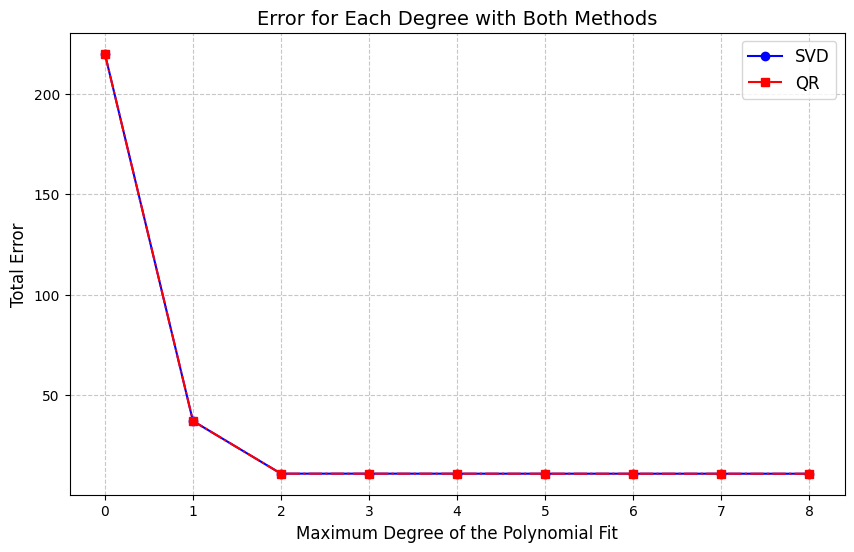

In [ ]:
# Plot the errors for SVD and QR methods
plt.figure(figsize=(6, 4))
plt.plot(svd_errors, label='SVD', marker='o', color='blue', linestyle='-')
plt.plot(qr_errors, label='QR', marker='s', color='red', linestyle='-.')

# Add title and labels
plt.title('Error for Each Degree with Both Methods', fontsize=14)
plt.xlabel('Maximum Degree of the Polynomial Fit', fontsize=12)
plt.ylabel('Total Error', fontsize=12)

plt.legend(fontsize=12)

# Optionally, set y-axis to logarithmic scale
# plt.yscale('log')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.savefig("lsp_error.png")
plt.close()

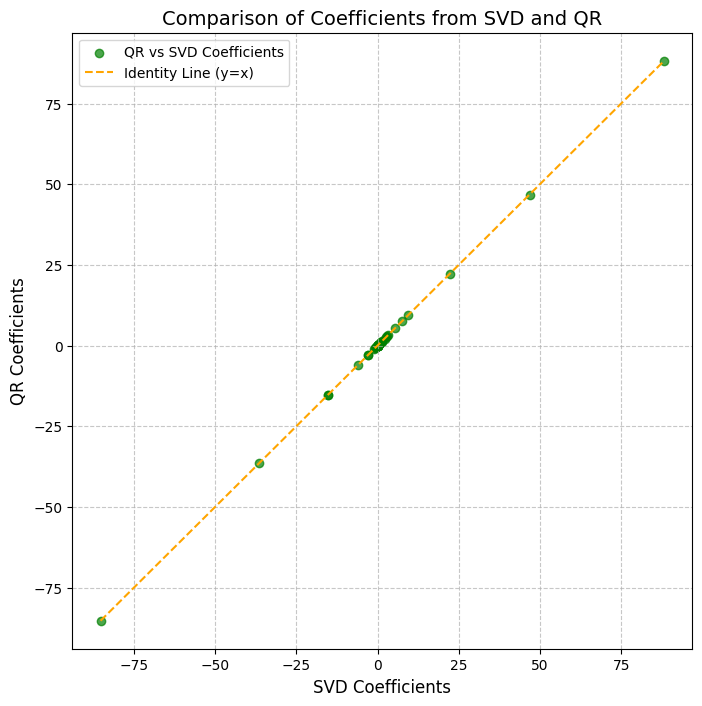

In [ ]:
# Flatten the coefficients into single lists for comparison
svd_flattened = np.concatenate(svd_coefs)
qr_flattened = np.concatenate(qr_coefs)

# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(svd_flattened, qr_flattened, color='green', alpha=0.7, label='QR vs SVD Coefficients')

# Identity line (y = x)
min_val = min(svd_flattened.min(), qr_flattened.min())
max_val = max(svd_flattened.max(), qr_flattened.max())
plt.plot([min_val, max_val], [min_val, max_val], color='orange', linestyle='--', label='Identity Line (y=x)')

# Add labels and title
plt.title('Comparison of Coefficients from SVD and QR', fontsize=14)
plt.xlabel('SVD Coefficients', fontsize=12)
plt.ylabel('QR Coefficients', fontsize=12)

# Add legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.savefig("lsp_id.png")
plt.close()

#### dataset rank defficient

In [ ]:
#Run the loop with the new expanded matrix every time

# Variables
max_degree = 10
svd_errors = []
qr_errors = []
svd_coefs = []
qr_coefs = []

# Loop through degrees
for d in range(1, max_degree):
    print('Degree:', d)
    A, b = load_csv(d=data_r)

    # SVD
    coefficients_svd = least_squares_svd(A, b)
    svd_coefs.append(coefficients_svd)
    svd_errors.append(np.linalg.norm(np.dot(A, coefficients_svd) - b))
    print(coefficients_svd)

    # QR
    coefficients_qr, residual_norm = least_squares_qr(A, b)
    qr_coefs.append(coefficients_qr)
    print(coefficients_qr)
    qr_errors.append(np.linalg.norm(np.dot(A, coefficients_qr) - b))

Degree: 1
[ 8.30184540e+00  8.30428216e+00 -1.88268350e+03  2.99498592e+04
 -2.12104358e+05  8.37034713e+05 -2.00324191e+06  2.97903439e+06
 -2.69206453e+06  1.35366101e+06 -2.90442987e+05]
[ 1.66061275e+01  0.00000000e+00 -1.88268350e+03  2.99498591e+04
 -2.12104358e+05  8.37034713e+05 -2.00324191e+06  2.97903439e+06
 -2.69206452e+06  1.35366101e+06 -2.90442987e+05]
Degree: 2
[ 8.30184540e+00  8.30428216e+00 -1.88268350e+03  2.99498592e+04
 -2.12104358e+05  8.37034713e+05 -2.00324191e+06  2.97903439e+06
 -2.69206453e+06  1.35366101e+06 -2.90442987e+05]
[ 1.66061275e+01  0.00000000e+00 -1.88268350e+03  2.99498591e+04
 -2.12104358e+05  8.37034713e+05 -2.00324191e+06  2.97903439e+06
 -2.69206452e+06  1.35366101e+06 -2.90442987e+05]
Degree: 3
[ 8.30184540e+00  8.30428216e+00 -1.88268350e+03  2.99498592e+04
 -2.12104358e+05  8.37034713e+05 -2.00324191e+06  2.97903439e+06
 -2.69206453e+06  1.35366101e+06 -2.90442987e+05]
[ 1.66061275e+01  0.00000000e+00 -1.88268350e+03  2.99498591e+04
 -2.1

In [ ]:
A, b = load_csv(data=data_r)

svd_coefs = []
svd_errors = []
qr_coefs = []
qr_errors = []

# SVD
coefficients_svd = least_squares_svd(A, b)
svd_coefs.append(coefficients_svd)
svd_errors.append(np.linalg.norm(np.dot(A, coefficients_svd) - b))
print(coefficients_svd)

# QR
coefficients_qr, residual_norm = least_squares_qr(A, b)
qr_coefs.append(coefficients_qr)
print(coefficients_qr)
qr_errors.append(np.linalg.norm(np.dot(A, coefficients_qr) - b))

[ 8.30184540e+00  8.30428216e+00 -1.88268350e+03  2.99498592e+04
 -2.12104358e+05  8.37034713e+05 -2.00324191e+06  2.97903439e+06
 -2.69206453e+06  1.35366101e+06 -2.90442987e+05]
[ 1.66061275e+01  0.00000000e+00 -1.88268350e+03  2.99498591e+04
 -2.12104358e+05  8.37034713e+05 -2.00324191e+06  2.97903439e+06
 -2.69206452e+06  1.35366101e+06 -2.90442987e+05]


In [ ]:
sol_svd_10 = least_squares_svd(A,b)
print('Solution norm for rank defficient:' , np.linalg.norm(sol_svd_10))
print('Error:', np.linalg.norm(np.dot(A,sol_svd_10)-b))
print('\n')

Solution norm for rank defficient: 4774736.291321675
Error: 1.149597895935293




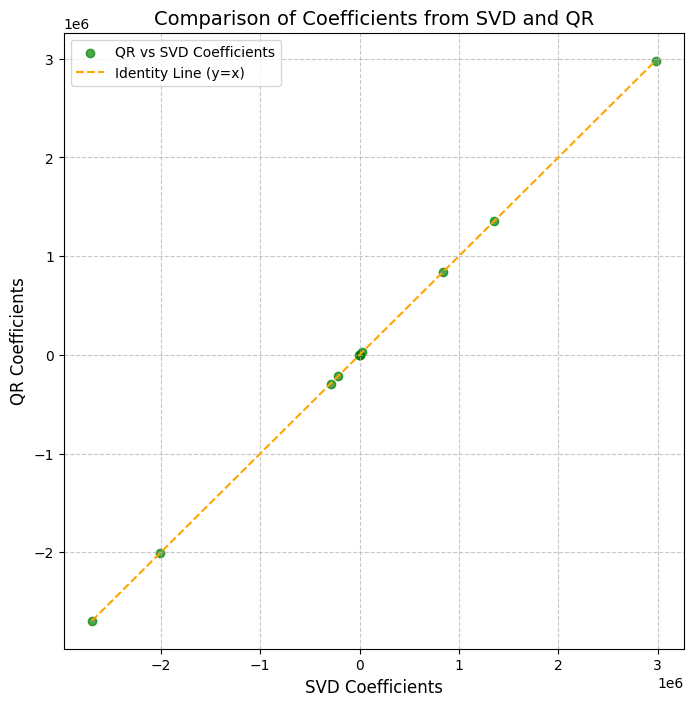

In [ ]:
# Flatten the coefficients into single lists for comparison
svd_flattened = np.concatenate(svd_coefs)
qr_flattened = np.concatenate(qr_coefs)

# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(svd_flattened, qr_flattened, color='green', alpha=0.7, label='QR vs SVD Coefficients')

# Identity line (y = x)
min_val = min(svd_flattened.min(), qr_flattened.min())
max_val = max(svd_flattened.max(), qr_flattened.max())
plt.plot([min_val, max_val], [min_val, max_val], color='orange', linestyle='--', label='Identity Line (y=x)')

# Add labels and title
plt.title('Comparison of Coefficients from SVD and QR', fontsize=14)
plt.xlabel('SVD Coefficients', fontsize=12)
plt.ylabel('QR Coefficients', fontsize=12)

# Add legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.savefig("lsp_id_def.png")
plt.close()